In [20]:
import numpy as np
import matplotlib.pyplot as plt
import RNA
import pandas as pd
import seaborn as sns

from src.rna_structure import RNAStructure
from src.path_finding import find_direct_path, find_best_indirect_path, T_CONST
import src.evolution as ev
import src.example_rna as ex
import src.evaluation as eval

%load_ext autoreload
%autoreload 2

# Enable nicer plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Define the RNA sequence and structures
seq = ex.LONG_SEQ
start_struct = ex.LONG_START_STRUCT
end_struct = ex.LONG_END_STRUCT

print(f"Sequence: {seq}")
print(f"Start structure: {start_struct}")
print(f"End structure: {end_struct}")

Sequence: ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG
Start structure: ......................(....................)....(.............)...................
End structure: .(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))


In [56]:
# Compare algorithms
results = eval.compare_algorithms(
    seq, 
    start_struct, 
    end_struct, 
    methods=['evolutionary'],
    evolutionary_params={'N': 200, 'max_steps': 100, 'alpha': 1.0},
)

print(results['evolutionary'])


Generation 10:
{'structure': '.(...................((........))............(((((((.......)))))))...............)', 'distance': 22, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '......................(....................)....((...........))...................', '................................................((...........))...................', '...............................................(((...........)))..................', '...............................................((((.........))))..................', '..............................................(((((.........))))).................', '.............................................((((((.........))))))................', '......................(........).............((((((.........))))))................', '.....................((........))............((((((.........))))))................', '.....................((........))............(((((((.......))))

In [33]:
results_t = []

for t in range(1, 20):
    results = eval.compare_algorithms(
        seq, 
        start_struct, 
        end_struct, 
        methods=['evolutionary'],
        evolutionary_params={'N': 100, 'max_steps': 80, 'T': t/10*T_CONST},
    )
    results_t.append(results['evolutionary'])


Generation 10:
{'structure': '....................((........))..................................................', 'distance': 38, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '................................................(.............)...................', '..................................................................................', '.....................(........)...................................................', '....................((........))..................................................', '..................(.((........)).)................................................', '....................((........))..................................................', '..................(.((........)).)................................................', '....................((........))..................................................', '..................(.((........)).).............................

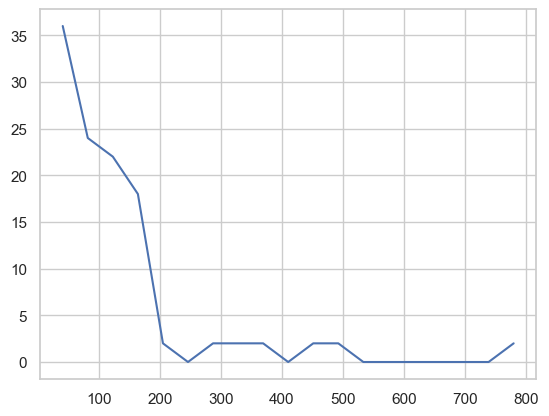

In [37]:
lengths = [results_t[i]['structure_distance'] for i in range(len(results_t))]
grad = [t/10*T_CONST for t in range(1, len(results_t)+1)]

plt.plot(grad, lengths)

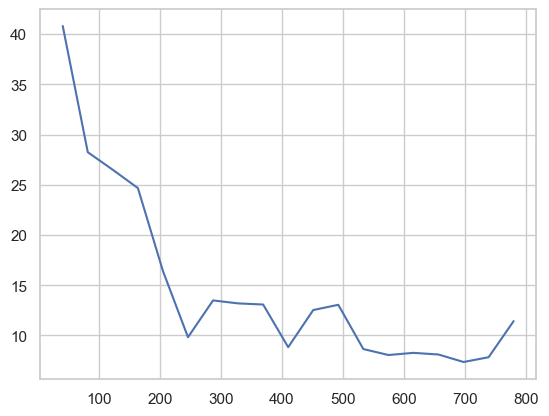

In [38]:
times = [results_t[i]['execution_time'] for i in range(len(results_t))]

plt.plot(grad, times)

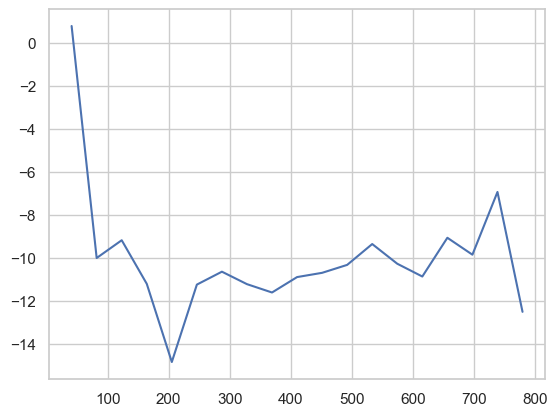

In [53]:
energy = [results_t[i]['average_energy'] for i in range(len(results_t))]

plt.plot(grad, energy)

In [57]:
results_alpha = []

for a in range(0, 11):
    results = eval.compare_algorithms(
        seq, 
        start_struct, 
        end_struct, 
        methods=['evolutionary'],
        evolutionary_params={'N': 100, 'max_steps': 80, 'alpha': a/10}
    )
    results_alpha.append(results['evolutionary'])


Generation 10:
{'structure': '............................(........................)............................', 'distance': 44, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '......................(....................)......................................', '..................................................................................', '............................(........................)............................'], 'energy_profile': [0, 6.800000190734863, 0.0, 4.400000095367432]}

Generation 20:
{'structure': '.........................(((((....(..((....))..)....))))).........................', 'distance': 57, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '......................(....................)......................................', '..................................................................................', '......

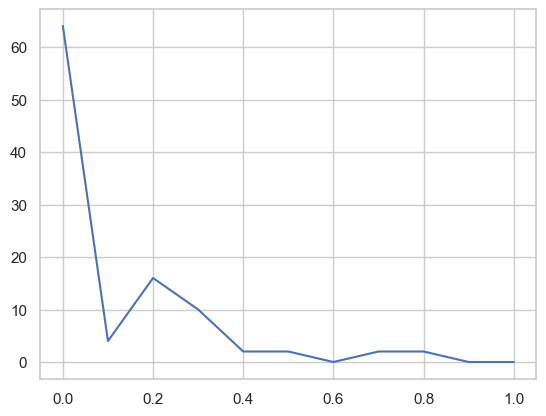

In [58]:
lengths_alpha = [results_alpha[i]['structure_distance'] for i in range(len(results_alpha))]
grad_alpha = [a/10 for a in range(0, 11)]

plt.plot(grad_alpha, lengths_alpha)

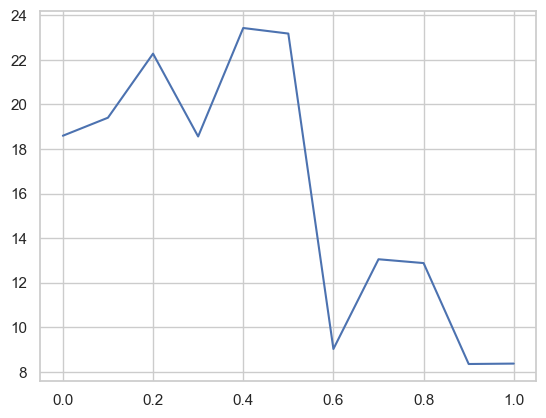

In [59]:
times_alpha = [results_alpha[i]['execution_time'] for i in range(len(results_alpha))]

plt.plot(grad_alpha, times_alpha)

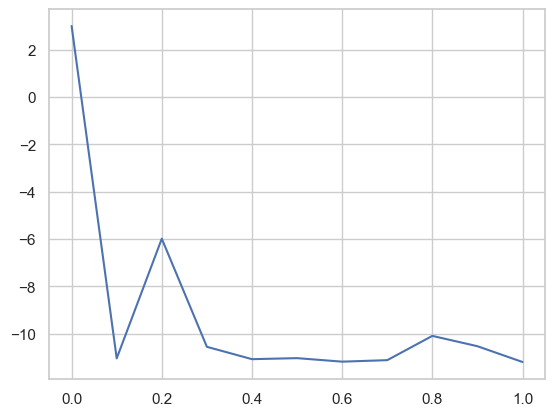

In [60]:
energy_alpha = [results_alpha[i]['average_energy'] for i in range(len(results_alpha))]

plt.plot(grad_alpha, energy_alpha)

In [74]:
results_beta = []

for b in range(0, 11):
    results = eval.compare_algorithms(
        seq, 
        start_struct, 
        end_struct, 
        methods=['evolutionary'],
        evolutionary_params={'N': 200, 'max_steps': 80, 'beta': b}
    )
    results_beta.append(results['evolutionary'])


Generation 10:
{'structure': '....................((........)).............(((((((.......))))))).........(....).', 'distance': 23, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '................................................(.............)...................', '................................................((...........))...................', '...............................................(((...........)))..................', '..............................................((((...........)))).................', '.............................................(((((...........)))))................', '.............................................((((((.........))))))................', '.............................................(((((((.......)))))))................', '.....................(........)..............(((((((.......)))))))................', '....................((........)).............(((((((.......))))

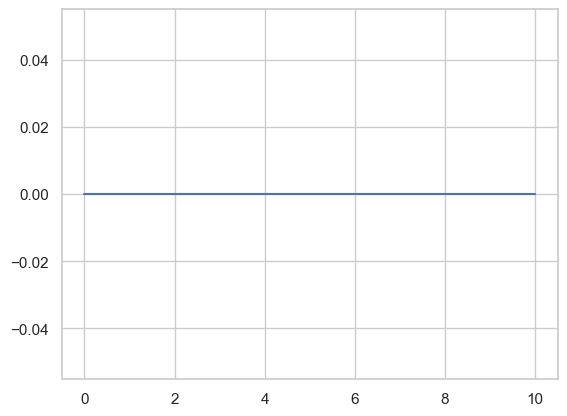

In [75]:
lengths_beta = [results_beta[i]['structure_distance'] for i in range(len(results_beta))]
grad_beta = [b for b in range(0, 11)]

plt.plot(grad_beta, lengths_beta)

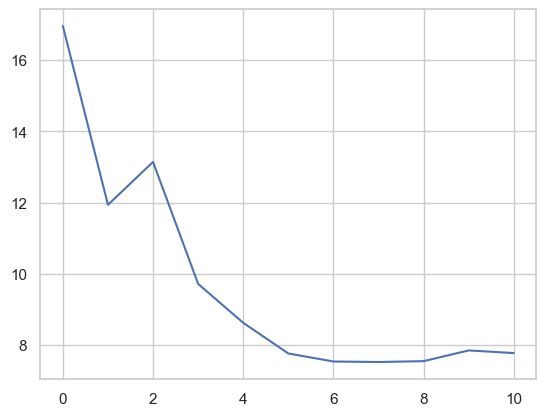

In [76]:
times_beta = [results_beta[i]['execution_time'] for i in range(len(results_beta))]

plt.plot(grad_beta, times_beta)

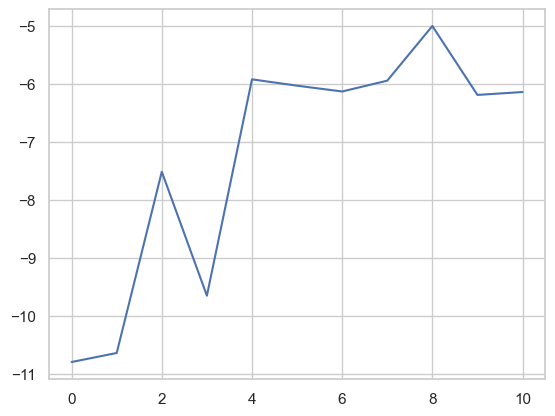

In [77]:
energy_beta = [results_beta[i]['average_energy'] for i in range(len(results_beta))]

plt.plot(grad_beta, energy_beta)